In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim
import torchvision.models as models

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'functions')))
from dataset import ChestXrayDataset
from train import train
from evaluation import plot_results ,eval_on_metrics

In [2]:
IMAGE_PATH = "../archive/"
import glob

# Tüm alt klasörlerdeki jpg ve png dosyalarını alalım
image_paths = glob.glob(IMAGE_PATH + "**/images/*.[jp][pn]g", recursive=True)

print(f"Toplam {len(image_paths)} resim bulundu.")

Toplam 112120 resim bulundu.


In [3]:
TRAIN_PATH = '../data/AP_PA_Train.xlsx'
TEST_PATH = '../data/AP_PA_Test.xlsx'
VAL_PATH = '../data/AP_PA_Validation.xlsx'
LOG_PATH = 'logs/512x512nofinetune.log'
SAVE_PATH = 'models/512x512resnet50nofinetunebestmodel.pth'

In [4]:
num_classes = 2
EPOCHS = 30

In [5]:
model = models.resnet50(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

for param in model.fc.parameters():
    param.requires_grad = True

c:\Users\Furkan-PC\192.168.0.14+8000\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Furkan-PC\192.168.0.14+8000\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(device)

cuda


In [7]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [8]:
train_dataset = ChestXrayDataset(TRAIN_PATH, image_paths,transform=transform)
val_dataset = ChestXrayDataset(TEST_PATH,image_paths, transform=transform)
test_dataset = ChestXrayDataset(VAL_PATH,image_paths, transform=transform)

In [9]:
print("Train size : ",len(train_dataset))
print("Validation size : ",len(val_dataset))
print("Test size : ",len(test_dataset))

Train size :  78566
Validation size :  16491
Test size :  17063


In [10]:
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True,num_workers=6)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True,num_workers=6)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True,num_workers=6)

In [11]:
train_losses, train_accuracies, val_losses, val_accuracies = train(model, train_dataloader, val_dataloader, criterion, optimizer, device,save_path=SAVE_PATH,log_path=LOG_PATH,num_epochs=EPOCHS,patience=5)

Epoch 1/30 - Validation: 100%|██████████| 1031/1031 [02:38<00:00,  6.52it/s]


Epoch [1/30]
  Train Loss: 0.0958, Train Acc: 0.9679
  Val   Loss: 0.0459, Val   Acc: 0.9873
  Best model saved with val_loss: 0.0459


Epoch 2/30 - Validation: 100%|██████████| 1031/1031 [02:39<00:00,  6.45it/s]


Epoch [2/30]
  Train Loss: 0.0693, Train Acc: 0.9789
  Val   Loss: 0.0434, Val   Acc: 0.9891
  Best model saved with val_loss: 0.0434


Epoch 3/30 - Validation: 100%|██████████| 1031/1031 [02:40<00:00,  6.43it/s]


Epoch [3/30]
  Train Loss: 0.0606, Train Acc: 0.9822
  Val   Loss: 0.0334, Val   Acc: 0.9923
  Best model saved with val_loss: 0.0334


Epoch 4/30 - Validation: 100%|██████████| 1031/1031 [02:39<00:00,  6.45it/s]


Epoch [4/30]
  Train Loss: 0.0590, Train Acc: 0.9828
  Val   Loss: 0.0317, Val   Acc: 0.9930
  Best model saved with val_loss: 0.0317


Epoch 5/30 - Validation: 100%|██████████| 1031/1031 [02:37<00:00,  6.54it/s]


Epoch [5/30]
  Train Loss: 0.0575, Train Acc: 0.9838
  Val   Loss: 0.0318, Val   Acc: 0.9932
  No improvement. Early stopping counter: 1/5


Epoch 6/30 - Validation: 100%|██████████| 1031/1031 [02:33<00:00,  6.73it/s]


Epoch [6/30]
  Train Loss: 0.0559, Train Acc: 0.9839
  Val   Loss: 0.0327, Val   Acc: 0.9929
  No improvement. Early stopping counter: 2/5


Epoch 7/30 - Validation: 100%|██████████| 1031/1031 [02:37<00:00,  6.56it/s]


Epoch [7/30]
  Train Loss: 0.0556, Train Acc: 0.9847
  Val   Loss: 0.0302, Val   Acc: 0.9936
  Best model saved with val_loss: 0.0302


Epoch 8/30 - Validation: 100%|██████████| 1031/1031 [02:37<00:00,  6.54it/s]


Epoch [8/30]
  Train Loss: 0.0541, Train Acc: 0.9852
  Val   Loss: 0.0310, Val   Acc: 0.9932
  No improvement. Early stopping counter: 1/5


Epoch 9/30 - Validation: 100%|██████████| 1031/1031 [02:39<00:00,  6.48it/s]


Epoch [9/30]
  Train Loss: 0.0514, Train Acc: 0.9853
  Val   Loss: 0.0312, Val   Acc: 0.9935
  No improvement. Early stopping counter: 2/5


Epoch 10/30 - Validation: 100%|██████████| 1031/1031 [02:48<00:00,  6.14it/s]


Epoch [10/30]
  Train Loss: 0.0526, Train Acc: 0.9855
  Val   Loss: 0.0303, Val   Acc: 0.9937
  No improvement. Early stopping counter: 3/5


Epoch 11/30 - Validation: 100%|██████████| 1031/1031 [02:39<00:00,  6.48it/s]


Epoch [11/30]
  Train Loss: 0.0512, Train Acc: 0.9859
  Val   Loss: 0.0297, Val   Acc: 0.9937
  Best model saved with val_loss: 0.0297


Epoch 12/30 - Validation: 100%|██████████| 1031/1031 [02:36<00:00,  6.60it/s]


Epoch [12/30]
  Train Loss: 0.0449, Train Acc: 0.9880
  Val   Loss: 0.0378, Val   Acc: 0.9919
  No improvement. Early stopping counter: 1/5


Epoch 13/30 - Validation: 100%|██████████| 1031/1031 [02:37<00:00,  6.53it/s]


Epoch [13/30]
  Train Loss: 0.0471, Train Acc: 0.9872
  Val   Loss: 0.0295, Val   Acc: 0.9938
  Best model saved with val_loss: 0.0295


Epoch 14/30 - Validation: 100%|██████████| 1031/1031 [02:37<00:00,  6.53it/s]


Epoch [14/30]
  Train Loss: 0.0510, Train Acc: 0.9865
  Val   Loss: 0.0289, Val   Acc: 0.9935
  Best model saved with val_loss: 0.0289


Epoch 15/30 - Validation: 100%|██████████| 1031/1031 [02:38<00:00,  6.49it/s]


Epoch [15/30]
  Train Loss: 0.0444, Train Acc: 0.9880
  Val   Loss: 0.0289, Val   Acc: 0.9935
  Best model saved with val_loss: 0.0289


Epoch 16/30 - Validation: 100%|██████████| 1031/1031 [02:41<00:00,  6.40it/s]


Epoch [16/30]
  Train Loss: 0.0457, Train Acc: 0.9879
  Val   Loss: 0.0302, Val   Acc: 0.9939
  No improvement. Early stopping counter: 1/5


Epoch 17/30 - Validation: 100%|██████████| 1031/1031 [02:38<00:00,  6.51it/s]


Epoch [17/30]
  Train Loss: 0.0454, Train Acc: 0.9879
  Val   Loss: 0.0294, Val   Acc: 0.9935
  No improvement. Early stopping counter: 2/5


Epoch 18/30 - Validation: 100%|██████████| 1031/1031 [02:39<00:00,  6.46it/s]


Epoch [18/30]
  Train Loss: 0.0465, Train Acc: 0.9877
  Val   Loss: 0.0282, Val   Acc: 0.9944
  Best model saved with val_loss: 0.0282


Epoch 19/30 - Validation: 100%|██████████| 1031/1031 [02:39<00:00,  6.44it/s]


Epoch [19/30]
  Train Loss: 0.0453, Train Acc: 0.9882
  Val   Loss: 0.0280, Val   Acc: 0.9940
  Best model saved with val_loss: 0.0280


Epoch 20/30 - Validation: 100%|██████████| 1031/1031 [02:38<00:00,  6.51it/s]


Epoch [20/30]
  Train Loss: 0.0485, Train Acc: 0.9866
  Val   Loss: 0.0309, Val   Acc: 0.9936
  No improvement. Early stopping counter: 1/5


Epoch 21/30 - Validation: 100%|██████████| 1031/1031 [02:39<00:00,  6.48it/s]


Epoch [21/30]
  Train Loss: 0.0452, Train Acc: 0.9876
  Val   Loss: 0.0281, Val   Acc: 0.9941
  No improvement. Early stopping counter: 2/5


Epoch 22/30 - Validation: 100%|██████████| 1031/1031 [02:39<00:00,  6.47it/s]


Epoch [22/30]
  Train Loss: 0.0435, Train Acc: 0.9883
  Val   Loss: 0.0280, Val   Acc: 0.9942
  Best model saved with val_loss: 0.0280


Epoch 23/30 - Validation: 100%|██████████| 1031/1031 [02:38<00:00,  6.49it/s]


Epoch [23/30]
  Train Loss: 0.0446, Train Acc: 0.9879
  Val   Loss: 0.0284, Val   Acc: 0.9940
  No improvement. Early stopping counter: 1/5


Epoch 24/30 - Validation: 100%|██████████| 1031/1031 [02:37<00:00,  6.53it/s]


Epoch [24/30]
  Train Loss: 0.0421, Train Acc: 0.9889
  Val   Loss: 0.0292, Val   Acc: 0.9936
  No improvement. Early stopping counter: 2/5


Epoch 25/30 - Validation: 100%|██████████| 1031/1031 [02:38<00:00,  6.50it/s]


Epoch [25/30]
  Train Loss: 0.0444, Train Acc: 0.9880
  Val   Loss: 0.0332, Val   Acc: 0.9927
  No improvement. Early stopping counter: 3/5


Epoch 26/30 - Validation: 100%|██████████| 1031/1031 [02:47<00:00,  6.17it/s]


Epoch [26/30]
  Train Loss: 0.0426, Train Acc: 0.9889
  Val   Loss: 0.0273, Val   Acc: 0.9944
  Best model saved with val_loss: 0.0273


Epoch 27/30 - Validation: 100%|██████████| 1031/1031 [02:38<00:00,  6.49it/s]


Epoch [27/30]
  Train Loss: 0.0433, Train Acc: 0.9883
  Val   Loss: 0.0292, Val   Acc: 0.9939
  No improvement. Early stopping counter: 1/5


Epoch 28/30 - Validation: 100%|██████████| 1031/1031 [02:39<00:00,  6.47it/s]


Epoch [28/30]
  Train Loss: 0.0407, Train Acc: 0.9899
  Val   Loss: 0.0332, Val   Acc: 0.9922
  No improvement. Early stopping counter: 2/5


Epoch 29/30 - Validation: 100%|██████████| 1031/1031 [02:37<00:00,  6.53it/s]


Epoch [29/30]
  Train Loss: 0.0437, Train Acc: 0.9878
  Val   Loss: 0.0296, Val   Acc: 0.9938
  No improvement. Early stopping counter: 3/5


Epoch 30/30 - Validation: 100%|██████████| 1031/1031 [02:33<00:00,  6.71it/s]

Epoch [30/30]
  Train Loss: 0.0419, Train Acc: 0.9890
  Val   Loss: 0.0282, Val   Acc: 0.9940
  No improvement. Early stopping counter: 4/5


In [12]:
print(f"num_epochs: {EPOCHS}")
print(f"train_losses: {len(train_losses)}")
print(f"val_losses: {len(val_losses)}")
print(f"train_accuracies: {len(train_accuracies)}")
print(f"val_accuracies: {len(val_accuracies)}")


num_epochs: 30
train_losses: 30
val_losses: 30
train_accuracies: 30
val_accuracies: 30


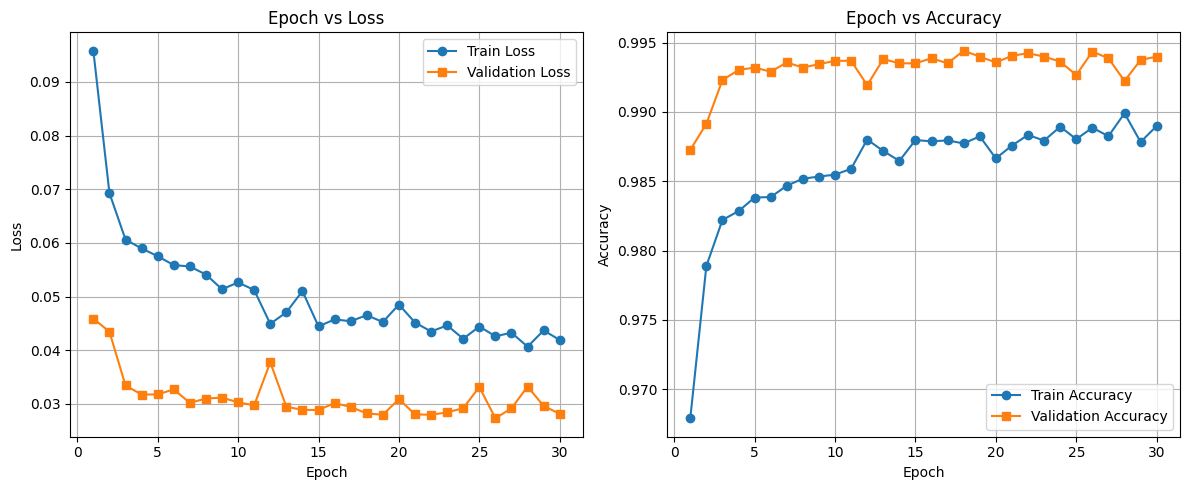

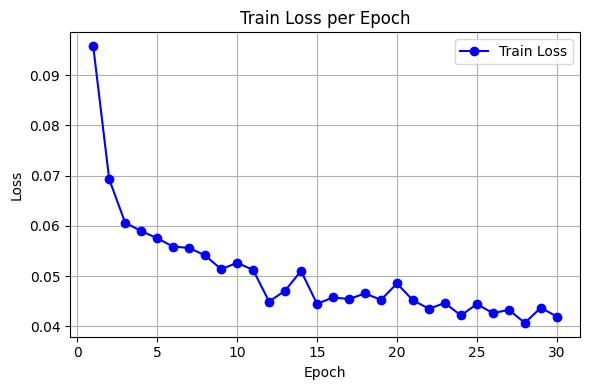

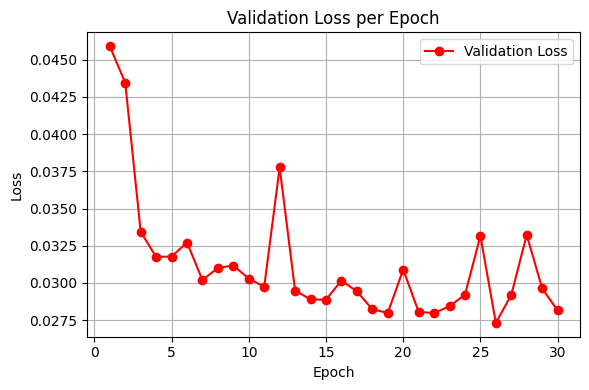

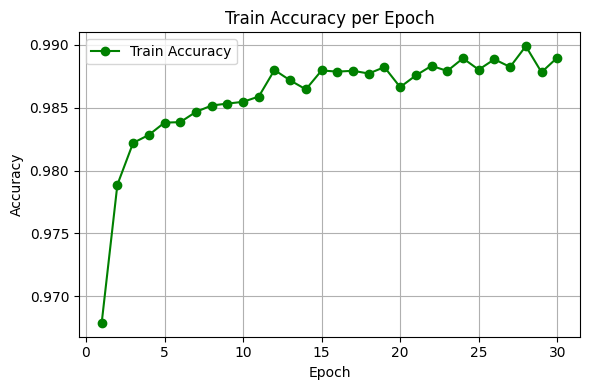

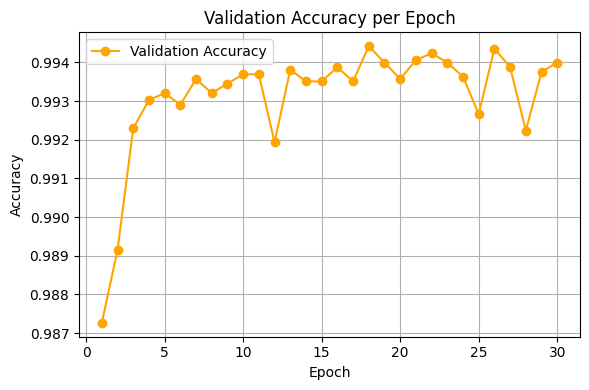

In [13]:
plot_results(train_losses, train_accuracies, val_losses, val_accuracies)

Evaluating: 100%|██████████| 1067/1067 [02:46<00:00,  6.41it/s]

Precision: 0.9932
Recall:    0.9979
F1 Score:  0.9955
AUC:       0.9986


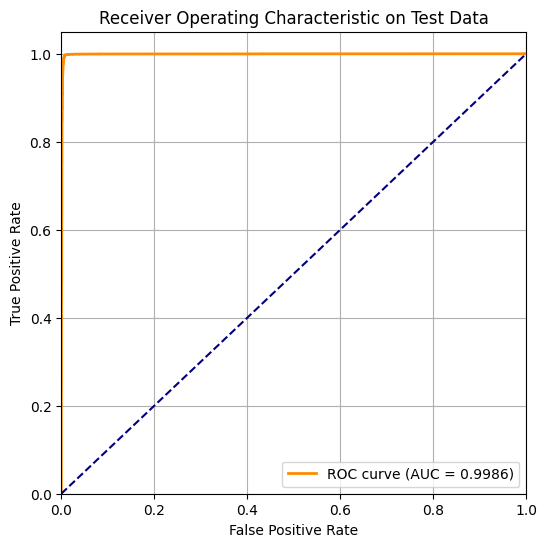

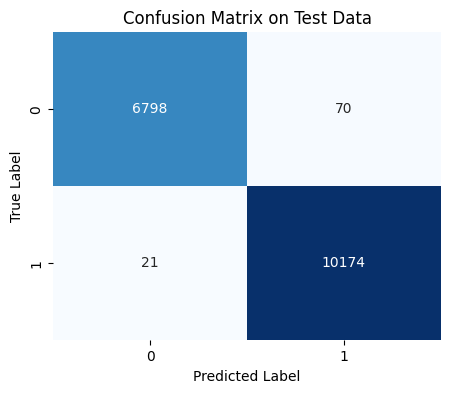

In [14]:
eval_on_metrics(model, test_dataloader)